In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# load and bin video tracking data

In [2]:
# load tracking data
video_dir = '../../data/raw/tracked_videos_DLC'
video_files = [f for f in os.listdir(video_dir) if f.endswith('.csv')]
video_files.sort()
print(video_files)
video_dfs = [pd.read_csv(os.path.join(video_dir, f)) for f in video_files]

['01_vid_1_tracking_filtered_rolling_median_5fr.csv', '01_vid_2_tracking_filtered_rolling_median_5fr.csv', '01_vid_3_tracking_filtered_rolling_median_5fr.csv', '01_vid_4_tracking_filtered_rolling_median_5fr.csv', '01_vid_5_tracking_filtered_rolling_median_5fr.csv']


In [3]:
# turn video_dfs datetime into pandas datetime
for i in range(len(video_dfs)):
    video_dfs[i]['datetime'] = pd.to_datetime(video_dfs[i]['datetime'])
# set speed to Nan where is_moving==False, low likelihood, speed is an outlier (>50 cm/s)
for i in range(len(video_dfs)):
    video_dfs[i].loc[video_dfs[i]['is_moving'] == False, 'speed_cm_s'] = np.nan
    video_dfs[i].loc[video_dfs[i]['is_outlier'] == True, 'speed_cm_s'] = np.nan
    video_dfs[i].loc[video_dfs[i]['neck_likelihood']<0.99, 'speed_cm_s'] = np.nan
    video_dfs[i].loc[video_dfs[i]['speed_cm_s']>50, 'speed_cm_s'] = np.nan

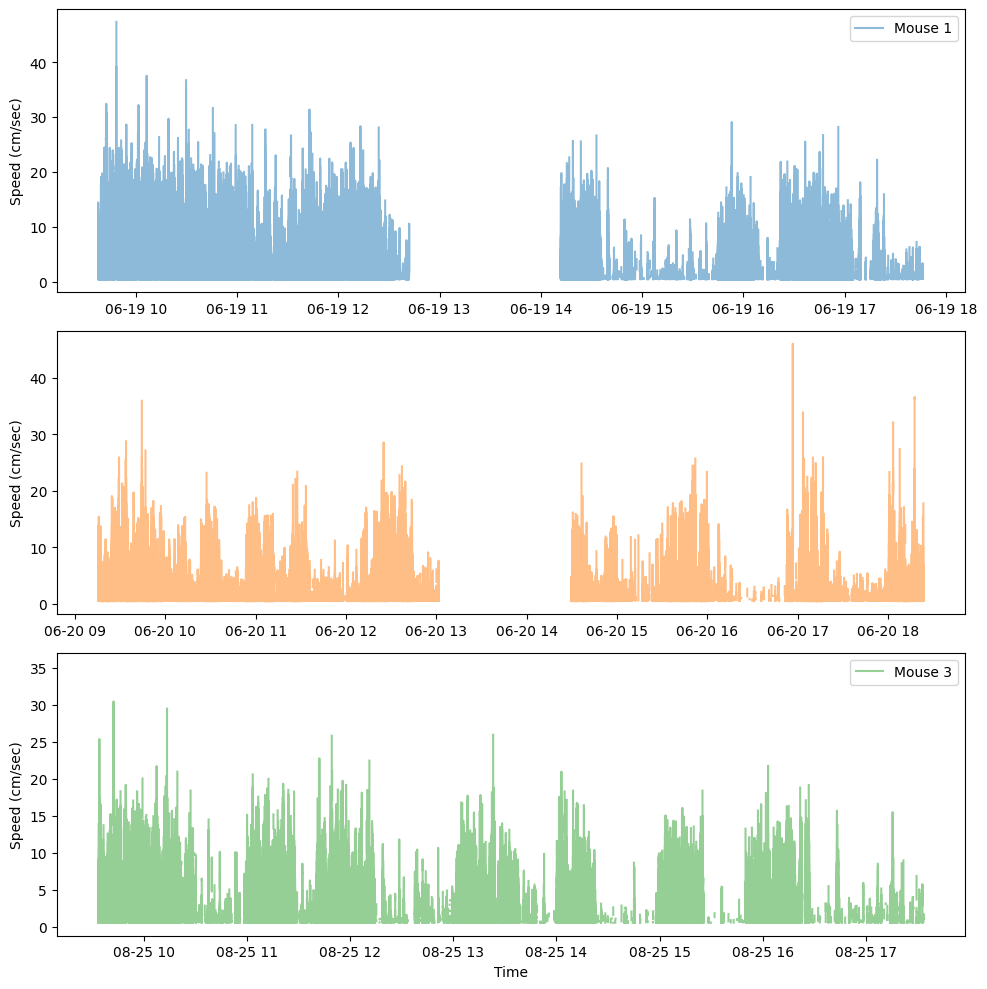

In [4]:
plt.figure(figsize=(10, 10))
plt.subplot(3,1,1)
plt.plot(video_dfs[0]['datetime'], video_dfs[0]['speed_cm_s'], label='Mouse 1',alpha=0.5)
plt.plot(video_dfs[1]['datetime'], video_dfs[1]['speed_cm_s'], color='tab:blue',alpha=0.5)
plt.ylabel('Speed (cm/sec)')
plt.legend()

plt.subplot(3,1,2)
plt.plot(video_dfs[2]['datetime'], video_dfs[2]['speed_cm_s'], label='Mouse 2', color='tab:orange',alpha=0.5)
plt.plot(video_dfs[3]['datetime'], video_dfs[3]['speed_cm_s'], color='tab:orange',alpha=0.5)
plt.ylabel('Speed (cm/sec)')

plt.subplot(3,1,3)
plt.plot(video_dfs[4]['datetime'], video_dfs[4]['speed_cm_s'], label='Mouse 3', color='tab:green',alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Speed (cm/sec)')
plt.legend()
plt.tight_layout()
plt.savefig('../../figures/supp/behavior_speed_all_days_cm_sec.pdf',dpi=300)
plt.show()

In [5]:
video_dfs[0].head()

,frame_number,time_seconds,time_hours,datetime,neck_x_coord,neck_y_coord,x_cm,y_cm,x_filtered_pixels,y_filtered_pixels,x_cm_filtered,y_cm_filtered,neck_likelihood,is_outlier,speed_cm_s,is_moving,cumulative_distance_cm,filtering_displacement_cm
0,0,0.000000,0.000000,2025-06-19 09:37:49.000000000,725.8275,307.5255,46.828381,19.840694,723.7574,305.38630,46.694824,19.702679,0.9981,False,NaN,False,0.000000,0.192057
1,1,0.033333,0.000009,2025-06-19 09:37:49.033333333,723.7574,305.3863,46.694824,19.702679,723.0687,304.70045,46.650391,19.658430,0.9986,False,1.881237,True,0.062708,0.062708
2,2,0.066667,0.000019,2025-06-19 09:37:49.066666667,721.5909,304.0146,46.555048,19.614181,722.4604,304.01460,46.611145,19.614181,0.9979,False,1.774373,True,0.121854,0.056098
3,3,0.100000,0.000028,2025-06-19 09:37:49.100000000,722.3800,301.2221,46.605958,19.434016,722.4604,302.55400,46.611145,19.519947,0.9976,False,2.827016,True,0.216088,0.086087
4,4,0.133333,0.000037,2025-06-19 09:37:49.133333333,722.4604,302.5540,46.611145,19.519947,722.4604,301.22210,46.611145,19.434016,0.9984,False,2.577915,True,0.302018,0.085931


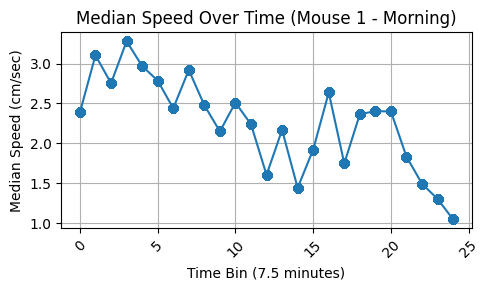

In [6]:
day1_beh_morning = video_dfs[0]
# turn time into seconds
day1_beh_morning['time'] = day1_beh_morning['datetime'].apply(lambda x: x.hour * 3600 + x.minute*60 + x.second)
# start from the first time point, and bin the data into 7.5 minute bins (450 seconds)
day1_beh_morning['time_bin'] = ((day1_beh_morning['time'] - day1_beh_morning['time'][0]) // 450)
# calculate the mean speed for each bin
day1_beh_morning['mean_speed'] = day1_beh_morning.groupby('time_bin')['speed_cm_s'].transform('median')
# plot the median speed for each bin
plt.figure(figsize=(5, 3))
plt.plot(day1_beh_morning['time_bin'], day1_beh_morning['mean_speed'], marker='o', linestyle='-')
plt.xlabel('Time Bin (7.5 minutes)')
plt.ylabel('Median Speed (cm/sec)')
plt.title('Median Speed Over Time (Mouse 1 - Morning)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [7]:
video_dfs[1].head()

,frame_number,time_seconds,time_hours,datetime,neck_x_coord,neck_y_coord,x_cm,y_cm,x_filtered_pixels,y_filtered_pixels,x_cm_filtered,y_cm_filtered,neck_likelihood,is_outlier,speed_cm_s,is_moving,cumulative_distance_cm,filtering_displacement_cm
0,0,0.000000,0.000000,2025-06-19 14:11:51.000000000,588.159973,389.475678,37.326818,24.717574,586.742981,389.137787,37.236890,24.696130,0.999415,False,NaN,False,0.000000,0.092449
1,1,0.033333,0.000009,2025-06-19 14:11:51.033333333,586.742981,389.137787,37.236890,24.696130,586.501801,388.751785,37.221584,24.671633,0.999494,False,0.866573,True,0.028886,0.028886
2,2,0.066667,0.000019,2025-06-19 14:11:51.066666667,586.260620,388.365784,37.206278,24.647136,586.260620,388.365784,37.206278,24.647136,0.999346,False,0.866573,True,0.057772,0.000000
3,3,0.100000,0.000028,2025-06-19 14:11:51.100000000,585.846558,387.001282,37.180000,24.560540,586.213684,387.001282,37.203299,24.560540,0.999124,False,2.599428,True,0.144419,0.023299
4,4,0.133333,0.000037,2025-06-19 14:11:51.133333333,585.810242,385.531555,37.177695,24.467265,586.213684,385.531555,37.203299,24.467265,0.999038,False,2.798229,True,0.237693,0.025604


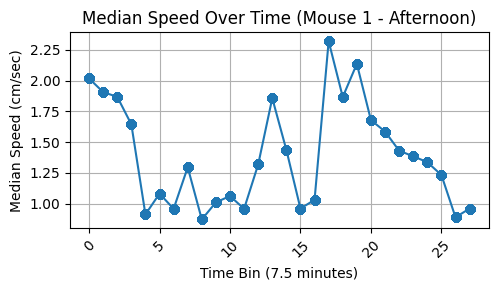

In [8]:
day1_beh_afternoon = video_dfs[1]
day1_beh_afternoon = day1_beh_afternoon[day1_beh_afternoon['datetime'] <= '2025-06-19 17:43:30']
## NOTE: there was a two minutes gap due to a power loss at time 4:06. Remove 4:06 to 4:08. See Notes
day1_beh_postpowerloss = day1_beh_afternoon[day1_beh_afternoon['datetime'] >= '2025-06-19 16:08:00']
day1_beh_postpowerloss.loc[:,'datetime'] = day1_beh_postpowerloss['datetime'] - pd.Timedelta(minutes=2)
# remove two minutes gap
day1_beh_afternoon = pd.concat([day1_beh_afternoon[day1_beh_afternoon['datetime'] < '2025-06-19 16:06:00'],
                                 day1_beh_postpowerloss])
# turn everything into seconds
day1_beh_afternoon['time'] = day1_beh_afternoon['datetime'].apply(lambda x: x.hour * 3600 + x.minute*60 + x.second)
# start from the first time point, and bin the data into 7.5 minute bins (450 seconds)
day1_beh_afternoon['time_bin'] = ((day1_beh_afternoon['time'] - day1_beh_afternoon['time'][0]) // 450)
# calculate the median speed for each bin
day1_beh_afternoon['mean_speed'] = day1_beh_afternoon.groupby('time_bin')['speed_cm_s'].transform('median')
# plot the mean speed for each bin
plt.figure(figsize=(5, 3))
plt.plot(day1_beh_afternoon['time_bin'], day1_beh_afternoon['mean_speed'], marker='o', linestyle='-')
plt.xlabel('Time Bin (7.5 minutes)')
plt.ylabel('Median Speed (cm/sec)')
plt.title('Median Speed Over Time (Mouse 1 - Afternoon)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

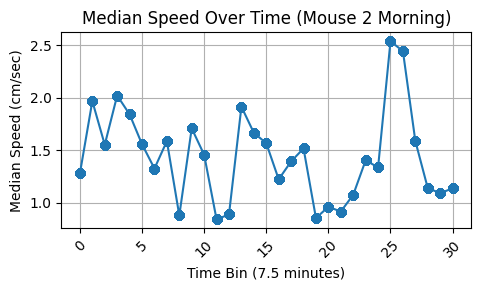

In [9]:
day2_beh_morning = video_dfs[2]
day2_beh_morning['time'] = day2_beh_morning['datetime'].apply(lambda x: x.hour * 3600 + x.minute*60 + x.second)
# start from the first time point, and bin the data into 7.5 minute bins (450 seconds)
day2_beh_morning['time_bin'] = ((day2_beh_morning['time'] - day2_beh_morning['time'][0]) // 450)
# calculate the median speed for each bin
day2_beh_morning['mean_speed'] = day2_beh_morning.groupby('time_bin')['speed_cm_s'].transform('median')
# plot the mean speed for each bin
plt.figure(figsize=(5, 3))
plt.plot(day2_beh_morning['time_bin'], day2_beh_morning['mean_speed'], marker='o', linestyle='-')
plt.xlabel('Time Bin (7.5 minutes)')
plt.ylabel('Median Speed (cm/sec)')
plt.title('Median Speed Over Time (Mouse 2 Morning)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


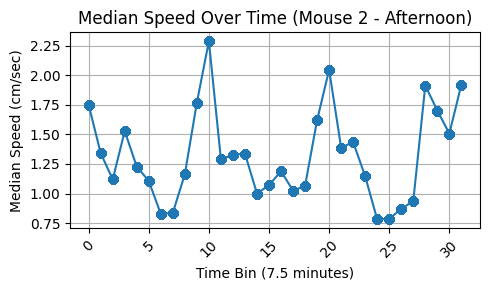

In [10]:
day2_beh_afternoon = video_dfs[3]
day2_beh_afternoon['time'] = day2_beh_afternoon['datetime'].apply(lambda x: x.hour * 3600 + x.minute*60 + x.second)
# start from the first time point, and bin the data into 7.5 minute bins (450 seconds)
day2_beh_afternoon['time_bin'] = ((day2_beh_afternoon['time'] - day2_beh_afternoon['time'][0]) // 450)
# calculate the mean speed for each bin
day2_beh_afternoon['mean_speed'] = day2_beh_afternoon.groupby('time_bin')['speed_cm_s'].transform('median')
# plot the mean speed for each bin
plt.figure(figsize=(5, 3))
plt.plot(day2_beh_afternoon['time_bin'], day2_beh_afternoon['mean_speed'], marker='o', linestyle='-')
plt.xlabel('Time Bin (7.5 minutes)')
plt.ylabel('Median Speed (cm/sec)')
plt.title('Median Speed Over Time (Mouse 2 - Afternoon)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

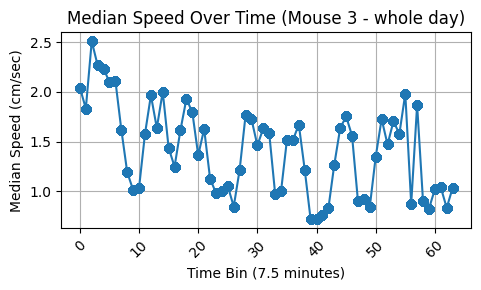

In [11]:
day3 = video_dfs[4]
# clip to 17:33 (end of microdialysis experiment)
day3_beh = day3[day3['datetime'] <= '2025-08-25 17:33:00'].copy() # clip to end of microdialysis recording
# # turn everything into seconds
day3_beh['time'] = day3_beh['datetime'].apply(lambda x: x.hour * 3600 + x.minute*60 + x.second)
# start from the first time point, and bin the data into 7.5 minute bins (450 seconds)
day3_beh['time_bin'] = ((day3_beh['time'] - day3_beh['time'][0]) // 450)
# # calculate the mean speed for each bin
day3_beh['mean_speed'] = day3_beh.groupby('time_bin')['speed_cm_s'].transform('median')
# plot the mean speed for each bin
plt.figure(figsize=(5, 3))
plt.plot(day3_beh['time_bin'], day3_beh['mean_speed'], marker='o', linestyle='-')
plt.xlabel('Time Bin (7.5 minutes)')
plt.ylabel('Median Speed (cm/sec)')
plt.title('Median Speed Over Time (Mouse 3 - whole day)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Load and clean LCMS data


In [12]:
# load LCMS data
lcms_dir = '../../data/raw/lcms/'
lcms_files = [f for f in os.listdir(lcms_dir) if f.startswith('dansyl')]
print(lcms_files)
# read data
dfs = [pd.read_csv(os.path.join(lcms_dir, f)) for f in lcms_files]

['dansyl_peak_pairs_mouse1.csv', 'dansyl_peak_pairs_mouse2.csv', 'dansyl_peak_pairs_mouse3.csv']


In [13]:
## Step 1: select compounds with high confidence identification (only Tier 1 & 2)
tier_dfs = [df[(df["Identification Level"] == "Tier 1") | (df["Identification Level"] == "Tier 2")].copy() for df in dfs]
# merge compound names of last dataset
tier_dfs[2]['Compound'] = tier_dfs[2]['Compound'].fillna(tier_dfs[2]['Compound.1'])
# extract compounds names
compounds = [df["Compound"].tolist() for df in tier_dfs]
print('Number of individual, high quality compounds per animal: ', [len(c) for c in compounds])
# find intersection of compounds in all 3 datasets
common_comps = list(set(compounds[0]).intersection(set(compounds[1])).intersection(set(compounds[2])))
common_comps.sort()
print('Number of intersection, high quality compounds: ', len(common_comps))
# filter datasets for common compounds
data = [td[td["Compound"].isin(common_comps)].reset_index(drop=True) for td in tier_dfs]
data = [d.sort_values("Compound").reset_index(drop=True) for d in data]

Number of individual, high quality compounds per animal:  [241, 343, 345]
Number of intersection, high quality compounds:  155


In [14]:
## Step 2: data extraction and columns renaming
log_transform = True
# data extraction and columns renaming (specific for dataset of mouse 1)
metadata = [d.iloc[:,:21] for d in data]
data[0] = data[0].iloc[:,21:-4]
if log_transform:
    data[0] = data[0].transform(lambda x: np.log2(x))
new_columns = []
for col in data[0].columns:
    name = col[-6:]
    if name[0] == '_':
        name = name[1:]
    new_columns.append(name)
data[0].columns = new_columns

# columns renaming (specific for dataset of mouse 2)
data[1] = data[1].iloc[:,21:-3]
if log_transform:
    data[1] = data[1].transform(lambda x: np.log2(x))
new_columns = []
for col in data[1].columns:
    parts = col.split('.')
    if len(parts) >= 2:
        new_col = f"{parts[0]}{int(float(parts[1])/2)+1}_{0}{int(float(parts[1])%2+1)}"
    else:
        new_col = col+"1_01"  # Default to _01 if no replicate info
    new_columns.append(new_col)
data[1].columns = new_columns

# columns renaming (specific for dataset of mouse 3)
data[2] = data[2].iloc[:, 24:-3]
if log_transform:
    data[2] = data[2].transform(lambda x: np.log2(x))
new_columns = []
for icol in np.arange(0,data[2].shape[1],2):
    new_columns.append(f"{int(icol/2)+1}_01")
    new_columns.append(f"{int(icol/2)+1}_02")
data[2].columns = new_columns

# hstack data
alldata = np.hstack(data)

Text(0.5, 1.0, 'Median Intensities of Samples with Bounds')

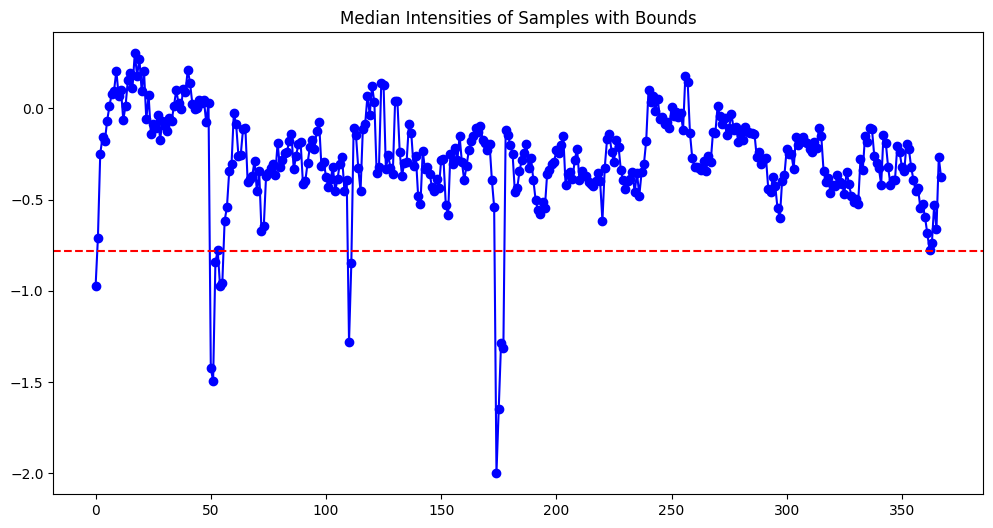

In [15]:
# check for columns with abnormally high or low values across all datasets
# --> remove samples with intensities out of bounds (median ± 4×MAD)
median_intensities = np.median(np.median(alldata,axis=0))
mad_intensities = np.median(np.abs(np.median(alldata,axis=0) - median_intensities))
lower_bound = median_intensities - 4 * mad_intensities
# plot median intensities of each sample
plt.figure(figsize=(12, 6))
plt.plot(np.median(alldata, axis=0), marker='o', linestyle='-', color='b')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Lower Bound')
plt.title('Median Intensities of Samples with Bounds')

In [16]:
# set columns below lower bound to NaN
for d in data:
    for col in d.columns:
        if d[col].median() < lower_bound:
            d[col] = np.nan

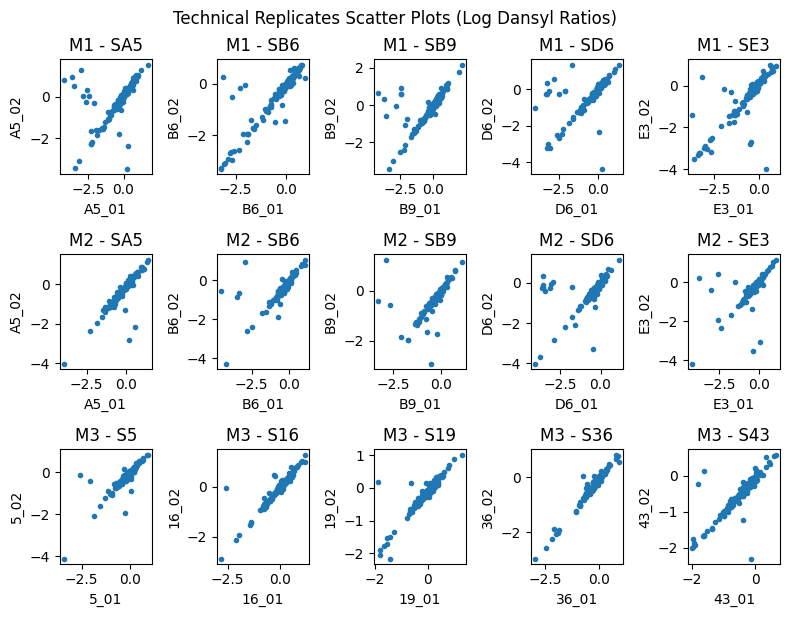

In [17]:
# check technical replicates -- plot scatter plots showing correlation between replicates
# pick a few examples
plt.figure(figsize=(8, 6))
for id, d in enumerate(data):
    for icol, col in enumerate(['A5', 'B6', 'B9', 'D6', 'E3']):
        plt.subplot(3,5,5*id + icol+1)
        if id == 2:
            col = str((ord(col[0].upper()) - ord('A'))*10 + int(col[1]))
        plt.scatter(d[col+'_01'], d[col+'_02'],marker='.',rasterized=True)
        plt.title(f'M{id+1} - S{col}')
        plt.xlabel(f'{col}_01')
        plt.ylabel(f'{col}_02')
plt.tight_layout()
plt.suptitle('Technical Replicates Scatter Plots (Log Dansyl Ratios)', y=1.02)
plt.savefig('../../figures/supp/technical_replicates_scatter_plots.pdf',dpi=300)
plt.show()

/home/nardinm@hhmi.org/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_755313/2235122044.py:3: RuntimeWarning: All-NaN slice encountered
  mean = np.nanmedian([data1, data2], axis=0)
/home/nardinm@hhmi.org/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


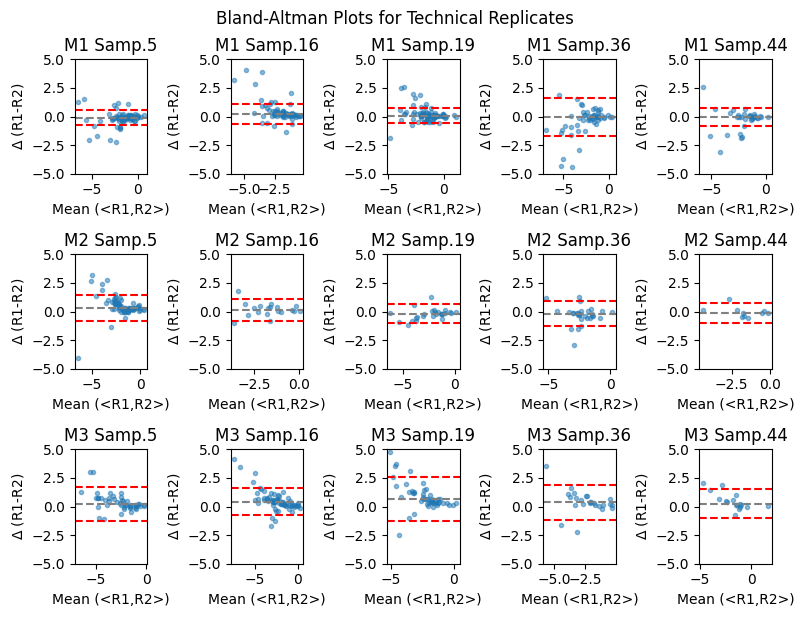

In [18]:
# BLAND-ALTMAN plot for technical replicates
def bland_altman_plot(data1, data2, title='Bland-Altman Plot'):
    mean = np.nanmedian([data1, data2], axis=0)
    diff = data1 - data2
    md = np.nanmedian(diff)
    sd = np.nanpercentile(diff, 75) - np.nanpercentile(diff, 25)
    plt.scatter(mean, diff, alpha=0.5,marker='.',rasterized=True)
    plt.axhline(md, color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='red', linestyle='--')
    plt.axhline(md - 1.96*sd, color='red', linestyle='--')
    plt.title(title)
    plt.xlabel('Mean (<R1,R2>)')
    plt.ylabel(r'$\Delta $ (R1-R2)')
    plt.ylim(-5,5)

# same examples as above
plt.figure(figsize=(8, 6))
for id, d in enumerate(data):
    for icol, col in enumerate(['A5', 'B6', 'B9', 'D6', 'E4']):
        plt.subplot(3,5,5*id + icol+1)
        if id == 2:
            col = str((ord(col[0].upper()) - ord('A'))*10 + int(col[1]))
            nsamp = col
        else:
            nsamp = str((ord(col[0].upper()) - ord('A'))*10 + int(col[1]))
        bland_altman_plot(np.log2(d[col+'_01']), np.log2(d[col+'_02']),
                           title=f'M{id+1} Samp.{nsamp}')
plt.tight_layout()
plt.suptitle('Bland-Altman Plots for Technical Replicates', y=1.02)
plt.savefig('../../figures/supp/bland_altman_plots.pdf',dpi=300)
plt.show()

In [19]:
# remove dirty technical replicates

def clean_row(row, thr=1): # this does the cleaning of every single compound
    row_clean = []
    for i in range(1, len(row), 2):
        diff = np.abs(row[i] - row[i-1]) # absolute difference of each technical replicate pair
        if diff > thr: # set to NaN if difference is above threshold
            row_clean.append(np.nan)
        else: # otherwise take the mean of the two replicates
            row_clean.append(np.mean(row[i-1:i+1]))
    return np.array(row_clean)

clean_data = []
for id, d in enumerate(data):
    clean_data.append([])
    for i in range(d.shape[0]):
        clean_data[id].append(clean_row(d.iloc[i,:].values, thr=1))
    clean_data[id] = np.array(clean_data[id])

In [20]:
# for day 1 and day 2, split into morning and afternoon (two separate recording sessions!)
# day 1 
day1_morning = clean_data[0][:, :26]
day1_afternoon = clean_data[0][:, 26:]
# day 2
day2_morning = clean_data[1][:, :32]
day2_afternoon = clean_data[1][:, 32:]
# day3
day3 = clean_data[2]
# print shapes
day1_morning.shape, day1_afternoon.shape, day2_morning.shape, day2_afternoon.shape, day3.shape

((155, 26), (155, 29), (155, 32), (155, 33), (155, 64))

In [21]:
# save cleaned data to csv file
np.savetxt('../../data/processed/day1_morning.csv', day1_morning, delimiter=',')
np.savetxt('../../data/processed/day1_afternoon.csv', day1_afternoon, delimiter=',')
np.savetxt('../../data/processed/day2_morning.csv', day2_morning, delimiter=',')
np.savetxt('../../data/processed/day2_afternoon.csv', day2_afternoon, delimiter=',')
np.savetxt('../../data/processed/day3.csv', day3, delimiter=',')

# align LCMS and Videos

In [22]:
# select only the unique values of mean speed (in order)
day1_morning_meanspeed = day1_beh_morning['mean_speed'].unique()
day1_afternoon_meanspeed = day1_beh_afternoon['mean_speed'].unique()
day2_morning_meanspeed = day2_beh_morning['mean_speed'].unique()
day2_afternoon_meanspeed = day2_beh_afternoon['mean_speed'].unique()
day3_meanspeed = day3_beh['mean_speed'].unique()
# print lengths
len(day1_morning_meanspeed), len(day1_afternoon_meanspeed), len(day2_morning_meanspeed), len(day2_afternoon_meanspeed), len(day3_meanspeed)

(25, 28, 31, 32, 64)

In [23]:
# Set the delay of LCMS to video to 15 minutes. So 2 bins delay for the hormones in order to be aligned.
X1m = day1_morning[:, 2:]  # remove first two samples to align with behavior
X1a = day1_afternoon[:, 2:]  # remove first two samples to align with behavior
X2m = day2_morning[:, 2:]  # remove first two samples to align with behavior
X2a = day2_afternoon[:, 2:]  # remove first two samples to align with behavior
X3 = day3[:,2:] # remove first 2 samples

y1m = day1_morning_meanspeed[:-1] # last microdialysis sample pushed out of tubes (see notes) 
y1a = day1_afternoon_meanspeed[:-1] 
y2m = day2_morning_meanspeed[:-1]  # last microdialysis sample pushed out of tubes (see notes)
y2a = day2_afternoon_meanspeed[:-1]  
y3 = day3_meanspeed[:-2]  # remove last two behavior time bins to align with hormones

In [26]:
# fill nan with linear interpolation
from scipy.interpolate import interp1d
def fill_nan_with_interpolation(arr):
    nans = np.isnan(arr)
    if np.all(nans):
        return arr  # return if all values are NaN
    x = np.arange(len(arr))
    f = interp1d(x[~nans], arr[~nans], kind=1, bounds_error=False, fill_value="extrapolate") # simple linear interpolation
    return f(x)

# fill nans for X datasets
X1m = np.array([fill_nan_with_interpolation(row) for row in X1m])
X1a = np.array([fill_nan_with_interpolation(row) for row in X1a])
X2m = np.array([fill_nan_with_interpolation(row) for row in X2m])
X2a = np.array([fill_nan_with_interpolation(row) for row in X2a])
X3 = np.array([fill_nan_with_interpolation(row) for row in X3])

In [27]:
# save common compounds aligned with behavior, and list of compound names
np.save('../../data/processed/compounds_aligned_speed.npy', {'X1m':X1m, 'X1a':X1a, 'X2m':X2m, 'X2a':X2a, 'X3':X3, 'y1m':y1m, 'y1a':y1a, 'y2m':y2m, 'y2a':y2a, 'y3':y3, 'common_comps':common_comps})

In [28]:
# concatenate X1m, a np.zeros(9, 155), and X1a
X1_full = np.hstack((X1m, np.zeros((X1m.shape[0], 9))*np.nan, X1a))
y1_full = np.hstack((y1m, np.zeros(9)*np.nan, y1a))
# concatenate X2m, a np.zeros   (9, 155), and X2a
X2_full = np.hstack((X2m, np.zeros((X2m.shape[0], 9))*np.nan, X2a))
y2_full = np.hstack((y2m, np.zeros(9)*np.nan, y2a))

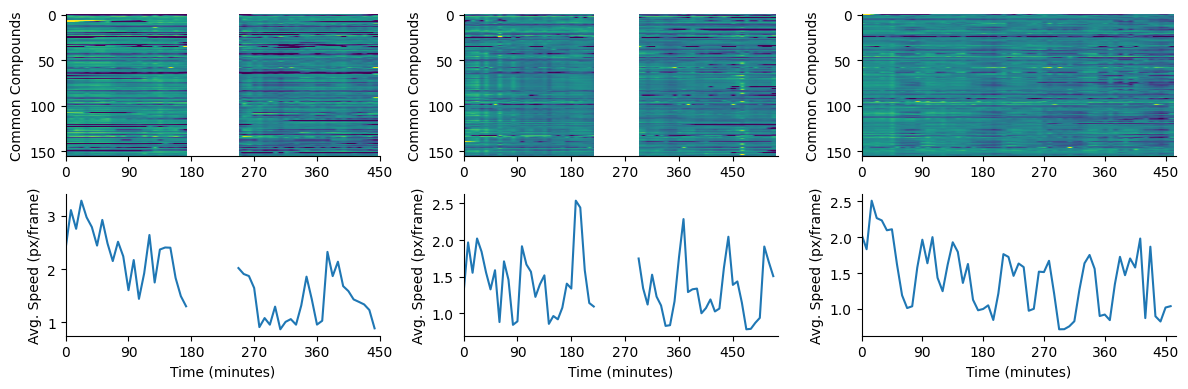

In [29]:
def anim_comps_speed(X, y, title='', pos=0):
    plt.subplot(2, 3, 1 + pos)
    plt.imshow(X, aspect='auto', cmap='viridis',vmin=-2.3, vmax=2.3)
    # plt.colorbar(label='Dansyl Ratio')
    plt.xticks([0,12,24,36,48,60],[0,90,180,270,360,450])
    plt.ylabel('Common Compounds')
    plt.xlim(0,len(y))
    # remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.subplot(2, 3, 4 + pos)
    plt.plot(y)
    plt.xticks([0,12,24,36,48,60],[0,90,180,270,360,450])
    plt.xlabel('Time (minutes)')
    plt.ylabel('Avg. Speed (px/frame)')
    plt.xlim(0,len(y))
    # remvoe spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
# plot imshow
plt.figure(figsize=(12, 4))
anim_comps_speed(X1_full, y1_full, title='Day 1', pos=0)
anim_comps_speed(X2_full, y2_full, title='Day 2', pos=1)
anim_comps_speed(X3, y3, title='Day 3', pos=2)
plt.tight_layout()